<a href="https://colab.research.google.com/github/ntolayd/CE888/blob/main/Assignment/Rotation_HeightWidthShift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/My Drive/Test.zip"
!unzip "/content/gdrive/My Drive/Training.zip"

In [ ]:
import os 
import random
import shutil

In [ ]:
os.mkdir('Validation')
os.mkdir('Validation/Fire')
os.mkdir('Validation/No_Fire')

In [ ]:
#Creating validation folder and moving randomly selected images from traning folder to validation folder
random.seed(126)
source = 'Training/Fire'
dest = 'Validation/Fire'
files = os.listdir(source)
no_of_files = len(files) // 6

for file_name in random.sample(files, no_of_files):
    shutil.move(os.path.join(source, file_name), dest)


In [ ]:
#Creating validation folder and moving randomly selected images from traning folder to validation folder
random.seed(19)
source = 'Training/No_Fire'
dest = 'Validation/No_Fire'
files = os.listdir(source)
no_of_files = len(files) // 6

for file_name in random.sample(files, no_of_files):
    shutil.move(os.path.join(source, file_name), dest)


In [ ]:
import numpy as np
from tqdm import tqdm
from random import shuffle
import cv2
import os 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Flatten, Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop
from sklearn.metrics import classification_report
from skimage.color import rgb2hsv
import skimage

In [ ]:
Train_path = 'Training'
Test_path = 'Test'
Validation_path ='Validation'

In [ ]:
from skimage.color import rgb2hsv
def color_aug(img):
  img = img / 255
  new_img = rgb2hsv(img) * 255
  return new_img

In [ ]:
def noise(img):
    img = img / 255
    gimg = skimage.util.random_noise(img, mode='poisson') * 255
    return gimg 

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=45,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='reflect'
                                   )

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    Train_path,
    target_size=(254, 254),
    batch_size=64,
    color_mode='rgb',
    class_mode='binary',
    shuffle=True) # set as training data

validation_generator = validation_datagen.flow_from_directory(
    Validation_path, 
    target_size=(254, 254),
    color_mode='rgb',
    batch_size=64,
    class_mode='binary', shuffle=False) # set as validation data

test_generator = test_datagen.flow_from_directory(
        Test_path,
        target_size=(254, 254),
        color_mode='rgb',
        batch_size=1,
        class_mode='binary', shuffle=False)

Found 32814 images belonging to 2 classes.
Found 6561 images belonging to 2 classes.
Found 8617 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Fire': 0, 'No_Fire': 1}

**Xception**

In [ ]:
from keras.applications import Xception


xcep = Xception(
    include_top=False,
    input_shape=(254,254,3))
model = Sequential()
model.add(xcep)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.6))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.000075),
              metrics=['accuracy'])

83689472/83683744 [==============================] - 0s 0us/step


In [ ]:
history = model.fit(
          train_generator,
          steps_per_epoch = train_generator.samples // 64,
          validation_data = validation_generator, 
          validation_steps = validation_generator.samples // 64,
          epochs = 5)

Epoch 1/5
512/512 [==============================] - 526s 981ms/step - loss: 0.0940 - accuracy: 0.9635 - val_loss: 0.0107 - val_accuracy: 0.9972
Epoch 2/5
512/512 [==============================] - 501s 976ms/step - loss: 0.0105 - accuracy: 0.9962 - val_loss: 0.0225 - val_accuracy: 0.9971
Epoch 3/5
512/512 [==============================] - 501s 977ms/step - loss: 0.0089 - accuracy: 0.9975 - val_loss: 0.0077 - val_accuracy: 0.9979
Epoch 4/5
512/512 [==============================] - 501s 976ms/step - loss: 0.0102 - accuracy: 0.9974 - val_loss: 0.0087 - val_accuracy: 0.9982
Epoch 5/5
512/512 [==============================] - 500s 976ms/step - loss: 0.0110 - accuracy: 0.9978 - val_loss: 0.0108 - val_accuracy: 0.9985


In [ ]:
predictions = model.predict(test_generator)


In [ ]:

test_labels=test_generator.classes 

y_pred = [1 * (x[0]>=0.5) for x in predictions]

print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.88      0.77      5137
           1       0.69      0.39      0.50      3480

    accuracy                           0.68      8617
   macro avg       0.69      0.64      0.63      8617
weighted avg       0.68      0.68      0.66      8617



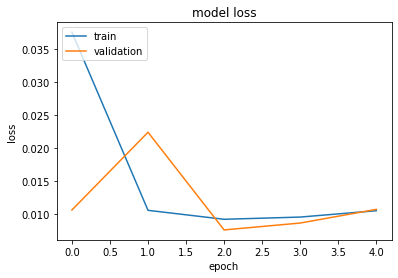

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

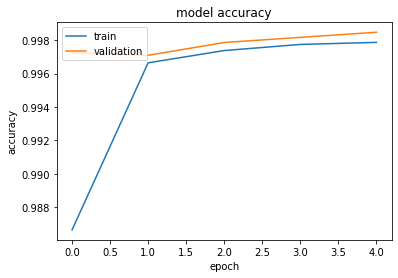

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


**DenseNet**

In [ ]:
from keras.applications import DenseNet121
densenet_v2 = DenseNet121(
    include_top=False,
    input_shape=(254,254,3))
model = Sequential()
model.add(densenet_v2)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.6))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.000075),
              metrics=['accuracy'])

29089792/29084464 [==============================] - 0s 0us/step


In [ ]:
history = model.fit(
          train_generator,
          steps_per_epoch = train_generator.samples // 64,
          validation_data = validation_generator, 
          validation_steps = validation_generator.samples // 64,
          epochs = 5)

Epoch 1/5
512/512 [==============================] - 464s 868ms/step - loss: 0.1175 - accuracy: 0.9503 - val_loss: 0.0123 - val_accuracy: 0.9959
Epoch 2/5
512/512 [==============================] - 438s 854ms/step - loss: 0.0151 - accuracy: 0.9960 - val_loss: 0.0189 - val_accuracy: 0.9974
Epoch 3/5
512/512 [==============================] - 441s 860ms/step - loss: 0.0164 - accuracy: 0.9963 - val_loss: 0.0043 - val_accuracy: 0.9988
Epoch 4/5
512/512 [==============================] - 441s 860ms/step - loss: 0.0123 - accuracy: 0.9970 - val_loss: 0.0062 - val_accuracy: 0.9974
Epoch 5/5
512/512 [==============================] - 440s 859ms/step - loss: 0.0101 - accuracy: 0.9968 - val_loss: 0.0106 - val_accuracy: 0.9979


In [ ]:
predictions = model.predict(test_generator)

In [ ]:
test_labels=test_generator.classes 

y_pred = [1 * (x[0]>=0.5) for x in predictions]

print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.54      0.70      5137
           1       0.60      1.00      0.75      3480

    accuracy                           0.73      8617
   macro avg       0.80      0.77      0.73      8617
weighted avg       0.84      0.73      0.72      8617



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 8, 8, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 7,562,817
Trainable params: 7,479,169
Non-trainable params: 83,648
_______________________________________

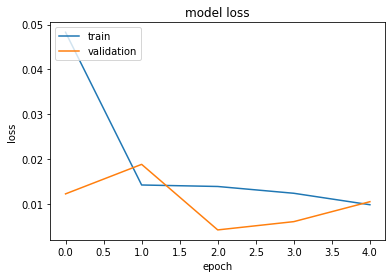

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

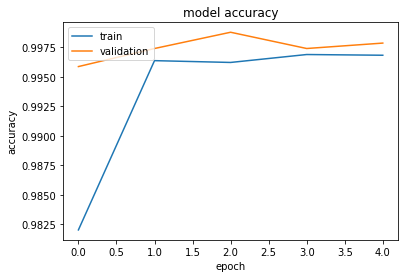

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


**VGG16**

In [ ]:
from keras.applications import VGG16
vgg16 = VGG16(
    include_top=False,
    input_shape=(254,254,3),
    classifier_activation="sigmoid")
model = Sequential()
model.add(vgg16)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.6))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.000075),
              metrics=['accuracy'])

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
history = model.fit(
          train_generator,
          steps_per_epoch = train_generator.samples // 64,
          validation_data = validation_generator, 
          validation_steps = validation_generator.samples // 64,
          epochs = 5)

Epoch 1/5
512/512 [==============================] - 456s 873ms/step - loss: 0.2410 - accuracy: 0.9051 - val_loss: 0.0285 - val_accuracy: 0.9850
Epoch 2/5
512/512 [==============================] - 440s 859ms/step - loss: 0.0611 - accuracy: 0.9762 - val_loss: 0.0260 - val_accuracy: 0.9953
Epoch 3/5
512/512 [==============================] - 442s 862ms/step - loss: 0.0871 - accuracy: 0.9812 - val_loss: 0.0179 - val_accuracy: 0.9966
Epoch 4/5
512/512 [==============================] - 443s 864ms/step - loss: 0.0676 - accuracy: 0.9816 - val_loss: 0.0676 - val_accuracy: 0.9665
Epoch 5/5
512/512 [==============================] - 439s 857ms/step - loss: 0.0843 - accuracy: 0.9863 - val_loss: 0.0180 - val_accuracy: 0.9957


In [ ]:
predictions = model.predict(test_generator)


In [ ]:
test_labels=test_generator.classes 

y_pred = [1 * (x[0]>=0.5) for x in predictions]

print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      5137
           1       0.76      0.66      0.71      3480

    accuracy                           0.78      8617
   macro avg       0.78      0.76      0.77      8617
weighted avg       0.78      0.78      0.78      8617



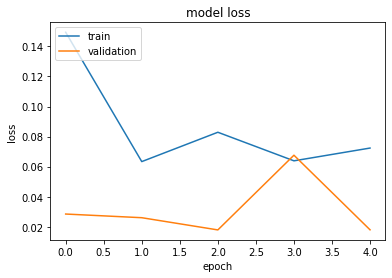

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

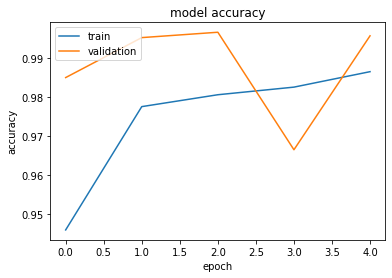

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


**ResNet**

In [ ]:
from keras.applications import ResNet101

resnet = ResNet101(
    include_top=False,
    input_shape=(254,254,3))
model = Sequential()
model.add(resnet)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.6))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.000075),
              metrics=['accuracy'])

171450368/171446536 [==============================] - 3s 0us/step


In [ ]:
history = model.fit(
          train_generator,
          steps_per_epoch = train_generator.samples // 64,
          validation_data = validation_generator, 
          validation_steps = validation_generator.samples // 64,
          epochs = 5)

Epoch 1/5
512/512 [==============================] - 480s 895ms/step - loss: 0.0845 - accuracy: 0.9677 - val_loss: 11.3685 - val_accuracy: 0.3614
Epoch 2/5
512/512 [==============================] - 458s 893ms/step - loss: 0.0200 - accuracy: 0.9949 - val_loss: 5.0322 - val_accuracy: 0.3897
Epoch 3/5
512/512 [==============================] - 457s 892ms/step - loss: 0.0191 - accuracy: 0.9956 - val_loss: 0.1604 - val_accuracy: 0.9801
Epoch 4/5
512/512 [==============================] - 457s 892ms/step - loss: 0.0168 - accuracy: 0.9963 - val_loss: 0.9233 - val_accuracy: 0.9076
Epoch 5/5
512/512 [==============================] - 456s 890ms/step - loss: 0.0189 - accuracy: 0.9963 - val_loss: 0.0285 - val_accuracy: 0.9934


In [ ]:
predictions = model.predict(test_generator)


In [ ]:
# import classification_report
from sklearn.metrics import classification_report

# get the ground truth of your data. 
test_labels=test_generator.classes 

y_pred = [1 * (x[0]>=0.5) for x in predictions]

# get the classification report
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.65      0.75      5137
           1       0.63      0.89      0.74      3480

    accuracy                           0.75      8617
   macro avg       0.77      0.77      0.75      8617
weighted avg       0.79      0.75      0.75      8617



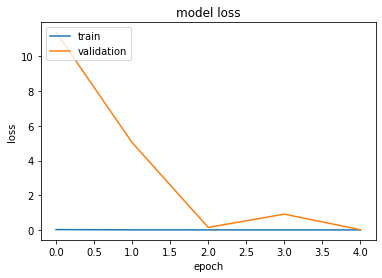

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

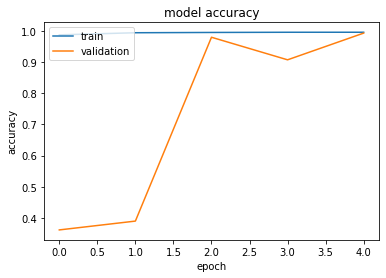

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
